In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings


plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (16,8)
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/평균이용량_대여_반납.csv")
seoul = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/서울시_그리드_데이터종합(연면적sum,거주인구).csv", encoding = 'cp949')

# 서울시 평균이용량

In [4]:
df

,대여소번호,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
0,101.0,14919.0,14714.0,29633.0,17607.0,12026.0,730.0,40.593151,20.436986,20.156164
1,102.0,59082.0,54010.0,113092.0,67430.0,45662.0,730.0,154.920548,80.934247,73.986301
2,103.0,40655.0,38358.0,79013.0,46153.0,32860.0,730.0,108.236986,55.691781,52.545205
3,104.0,34652.0,30358.0,65010.0,39840.0,25170.0,730.0,89.054795,47.468493,41.586301
4,105.0,20565.0,18317.0,38882.0,20860.0,18022.0,730.0,53.263014,28.171233,25.091781
...,...,...,...,...,...,...,...,...,...,...
1506,3538.0,11992.0,9568.0,21560.0,9306.0,12254.0,730.0,29.534247,16.427397,13.106849
1507,3539.0,2457.0,2353.0,4810.0,1845.0,2965.0,730.0,6.589041,3.365753,3.223288
1508,3541.0,56642.0,42544.0,99186.0,54554.0,44632.0,730.0,135.871233,77.591781,58.279452
1509,3542.0,25905.0,20227.0,46132.0,26719.0,19413.0,730.0,63.194521,35.486301,27.708219


In [5]:
df.describe()

,대여소번호,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,1300.999338,20075.628061,18305.033091,38380.661152,19327.982131,19052.679021,716.252151,65.408182,34.127892,31.280290
std,815.275728,17581.136413,16131.538867,33501.494135,17100.730083,17137.696889,88.329564,159.577072,82.369919,77.720766
min,101.000000,179.000000,161.000000,340.000000,9.000000,266.000000,19.000000,0.950685,0.583562,0.286301
25%,583.500000,9347.500000,7946.500000,17336.500000,8106.000000,8643.000000,730.000000,24.070548,12.857534,11.009589
50%,1229.000000,16168.000000,14644.000000,30573.000000,15138.000000,15155.000000,730.000000,42.406849,22.436986,20.246575
75%,1959.500000,25921.500000,24202.500000,50333.000000,25806.500000,24900.000000,730.000000,70.402740,36.439726,33.984932
max,3543.000000,317792.000000,201692.000000,505278.000000,218286.000000,286992.000000,914.000000,3648.250000,1917.150000,1731.100000


## 이상치 제거

In [6]:
df.set_index(['대여소번호'], inplace=True)

In [7]:
# 이상한 값들 존재??
df.sort_values(by=['일별대여평균이용량'], ascending=False)

,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
대여소번호,,,,,,,,,
1124.0,38343.0,34622.0,72965.0,35963.0,37002.0,20.0,3648.250000,1917.150000,1731.100000
905.0,25550.0,27726.0,53276.0,25616.0,27660.0,19.0,2804.000000,1344.736842,1459.263158
152.0,114259.0,122056.0,236315.0,116086.0,120229.0,98.0,2411.377551,1165.908163,1245.469388
583.0,317792.0,187486.0,505278.0,218286.0,286992.0,914.0,1719.118865,1081.230971,637.887895
2348.0,25729.0,24968.0,50697.0,25849.0,24848.0,37.0,1370.189189,695.378378,674.810811
...,...,...,...,...,...,...,...,...,...
2286.0,1096.0,230.0,1326.0,710.0,616.0,730.0,1.816438,1.501370,0.315068
2395.0,866.0,554.0,1420.0,943.0,477.0,730.0,1.945205,1.186301,0.758904
2288.0,682.0,396.0,1078.0,650.0,428.0,730.0,1.476712,0.934247,0.542466


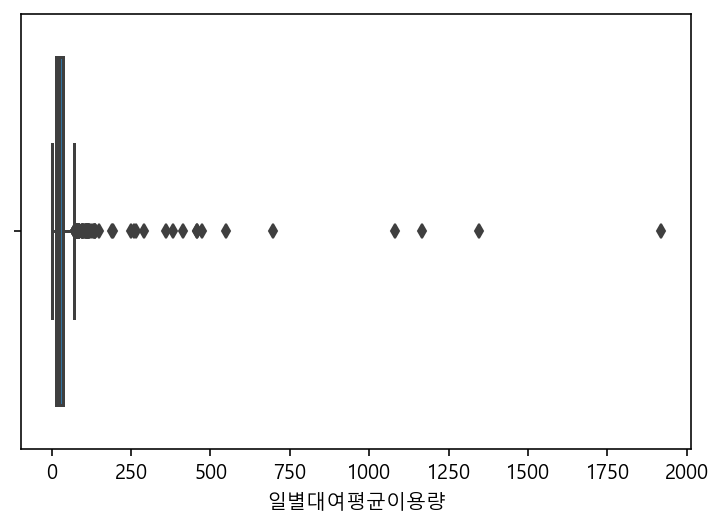

In [8]:
sns.boxplot(x = '일별대여평균이용량', data=df)
plt.show()

In [9]:
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [10]:
# 너무 많다..?
outlier_index = get_outlier(df=df, column='일별대여평균이용량', weight=1.5)
len(outlier_index)

76

In [11]:
len(df[(df['유지기간'] < 365)|(df['유지기간'] > 730)])

29

In [12]:
index = df[(df['유지기간'] < 365)|(df['유지기간'] > 730)].index

In [13]:
index

Float64Index([ 115.0,  134.0,  152.0,  222.0,  331.0,  394.0,  431.0,  447.0,
               543.0,  583.0,  593.0,  642.0,  710.0,  744.0,  905.0, 1018.0,
              1124.0, 1267.0, 1268.0, 1373.0, 1630.0, 1713.0, 1825.0, 1857.0,
              2140.0, 2244.0, 2348.0, 2394.0, 3509.0],
             dtype='float64', name='대여소번호')

In [14]:
df.drop(index, axis=0, inplace=True)
df

,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
대여소번호,,,,,,,,,
101.0,14919.0,14714.0,29633.0,17607.0,12026.0,730.0,40.593151,20.436986,20.156164
102.0,59082.0,54010.0,113092.0,67430.0,45662.0,730.0,154.920548,80.934247,73.986301
103.0,40655.0,38358.0,79013.0,46153.0,32860.0,730.0,108.236986,55.691781,52.545205
104.0,34652.0,30358.0,65010.0,39840.0,25170.0,730.0,89.054795,47.468493,41.586301
105.0,20565.0,18317.0,38882.0,20860.0,18022.0,730.0,53.263014,28.171233,25.091781
...,...,...,...,...,...,...,...,...,...
3538.0,11992.0,9568.0,21560.0,9306.0,12254.0,730.0,29.534247,16.427397,13.106849
3539.0,2457.0,2353.0,4810.0,1845.0,2965.0,730.0,6.589041,3.365753,3.223288
3541.0,56642.0,42544.0,99186.0,54554.0,44632.0,730.0,135.871233,77.591781,58.279452


# 서울시 지리정보

In [15]:
seoul.head()

,Unnamed: 0,대여소번호,일별대여평균이용량,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
0,0,434,5.849315,0.0,120.72,0.0,0.00,0.00,0.0,54.60,0.0,149.728522,1642.164334,563.036939,24.326729,5.000000,34934.52200,212.346403
1,1,435,8.983562,0.0,0.00,0.0,4310.19,85472.04,0.0,0.00,0.0,504.291251,1042.953142,301.631077,97.439857,6.250000,6830.95200,177.928193
2,2,431,413.000000,0.0,0.00,0.0,0.00,0.00,0.0,43046.72,0.0,222.825136,1429.622507,325.755994,101.309421,2.750000,34813.29050,285.819332
3,3,433,34.647945,0.0,844.29,0.0,1163.53,15356.87,0.0,438.41,0.0,338.249786,1020.724567,86.119615,91.755373,0.333333,3751.51500,199.707461
4,4,826,26.660274,0.0,2195.41,0.0,0.00,11709.75,0.0,1186.22,0.0,167.241794,1058.467066,338.374132,143.783249,1.000000,15547.31375,362.367275


In [17]:
seoul.drop(['Unnamed: 0','일별대여평균이용량'], axis=1,inplace=True)
seoul.set_index(['대여소번호'], inplace=True)

In [18]:
seoul.drop(index, axis=0, inplace=True)

In [19]:
seoul

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
대여소번호,,,,,,,,,,,,,,,
434,0.00,120.72,0.00,0.00,0.00,0.0,54.60,0.00,149.728522,1642.164334,563.036939,24.326729,5.000000,34934.522000,212.346403
435,0.00,0.00,0.00,4310.19,85472.04,0.0,0.00,0.00,504.291251,1042.953142,301.631077,97.439857,6.250000,6830.952000,177.928193
433,0.00,844.29,0.00,1163.53,15356.87,0.0,438.41,0.00,338.249786,1020.724567,86.119615,91.755373,0.333333,3751.515000,199.707461
826,0.00,2195.41,0.00,0.00,11709.75,0.0,1186.22,0.00,167.241794,1058.467066,338.374132,143.783249,1.000000,15547.313750,362.367275
391,0.00,0.00,1853.44,0.00,101.02,0.0,0.00,0.00,168.168170,627.774040,360.584255,301.228718,1.500000,3269.474000,146.958537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.00,0.00,30250.17,0.00,3414.05,0.0,0.00,0.00,301.296503,1476.056360,228.234349,64.639858,6.500000,7757.807000,342.521270
808,0.00,1528.49,0.00,0.00,0.00,0.0,2556.72,0.00,600.270978,1083.238766,203.916066,31.647078,1.500000,4971.071000,113.048394
809,0.00,0.00,0.00,0.00,0.00,0.0,22369.46,0.00,94.054181,938.462006,176.031224,106.623219,1.500000,7757.807000,295.821736


# 최종데이터

In [20]:
total = seoul.join(df[['일별대여평균이용량']], how='left')

In [21]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1482 entries, 434 to 807
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   교육시설_sum      1482 non-null   float64
 1   근린생활시설_sum    1482 non-null   float64
 2   문화시설_sum      1482 non-null   float64
 3   숙박시설_sum      1482 non-null   float64
 4   업무시설_sum      1482 non-null   float64
 5   의료시설_sum      1482 non-null   float64
 6   주거시설_sum      1482 non-null   float64
 7   판매시설_sum      1482 non-null   float64
 8   공원_distance   1482 non-null   float64
 9   대학교_distance  1482 non-null   float64
 10  지하철_distance  1482 non-null   float64
 11  버스_distance   1482 non-null   float64
 12  경사도_mean      1482 non-null   float64
 13  거주인구          1482 non-null   float64
 14  도로길이          1482 non-null   float64
 15  일별대여평균이용량     1482 non-null   float64
dtypes: float64(16)
memory usage: 229.1+ KB


In [22]:
total

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이,일별대여평균이용량
대여소번호,,,,,,,,,,,,,,,,
434,0.00,120.72,0.00,0.00,0.00,0.0,54.60,0.00,149.728522,1642.164334,563.036939,24.326729,5.000000,34934.522000,212.346403,5.849315
435,0.00,0.00,0.00,4310.19,85472.04,0.0,0.00,0.00,504.291251,1042.953142,301.631077,97.439857,6.250000,6830.952000,177.928193,8.983562
433,0.00,844.29,0.00,1163.53,15356.87,0.0,438.41,0.00,338.249786,1020.724567,86.119615,91.755373,0.333333,3751.515000,199.707461,34.647945
826,0.00,2195.41,0.00,0.00,11709.75,0.0,1186.22,0.00,167.241794,1058.467066,338.374132,143.783249,1.000000,15547.313750,362.367275,26.660274
391,0.00,0.00,1853.44,0.00,101.02,0.0,0.00,0.00,168.168170,627.774040,360.584255,301.228718,1.500000,3269.474000,146.958537,15.436986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.00,0.00,30250.17,0.00,3414.05,0.0,0.00,0.00,301.296503,1476.056360,228.234349,64.639858,6.500000,7757.807000,342.521270,12.101370
808,0.00,1528.49,0.00,0.00,0.00,0.0,2556.72,0.00,600.270978,1083.238766,203.916066,31.647078,1.500000,4971.071000,113.048394,8.671233
809,0.00,0.00,0.00,0.00,0.00,0.0,22369.46,0.00,94.054181,938.462006,176.031224,106.623219,1.500000,7757.807000,295.821736,19.261644


In [23]:
total.to_csv("C:/Users/keogu/Desktop/IGPS/Data/서울시_그리드_데이터종합_수정.csv")

# 시각화

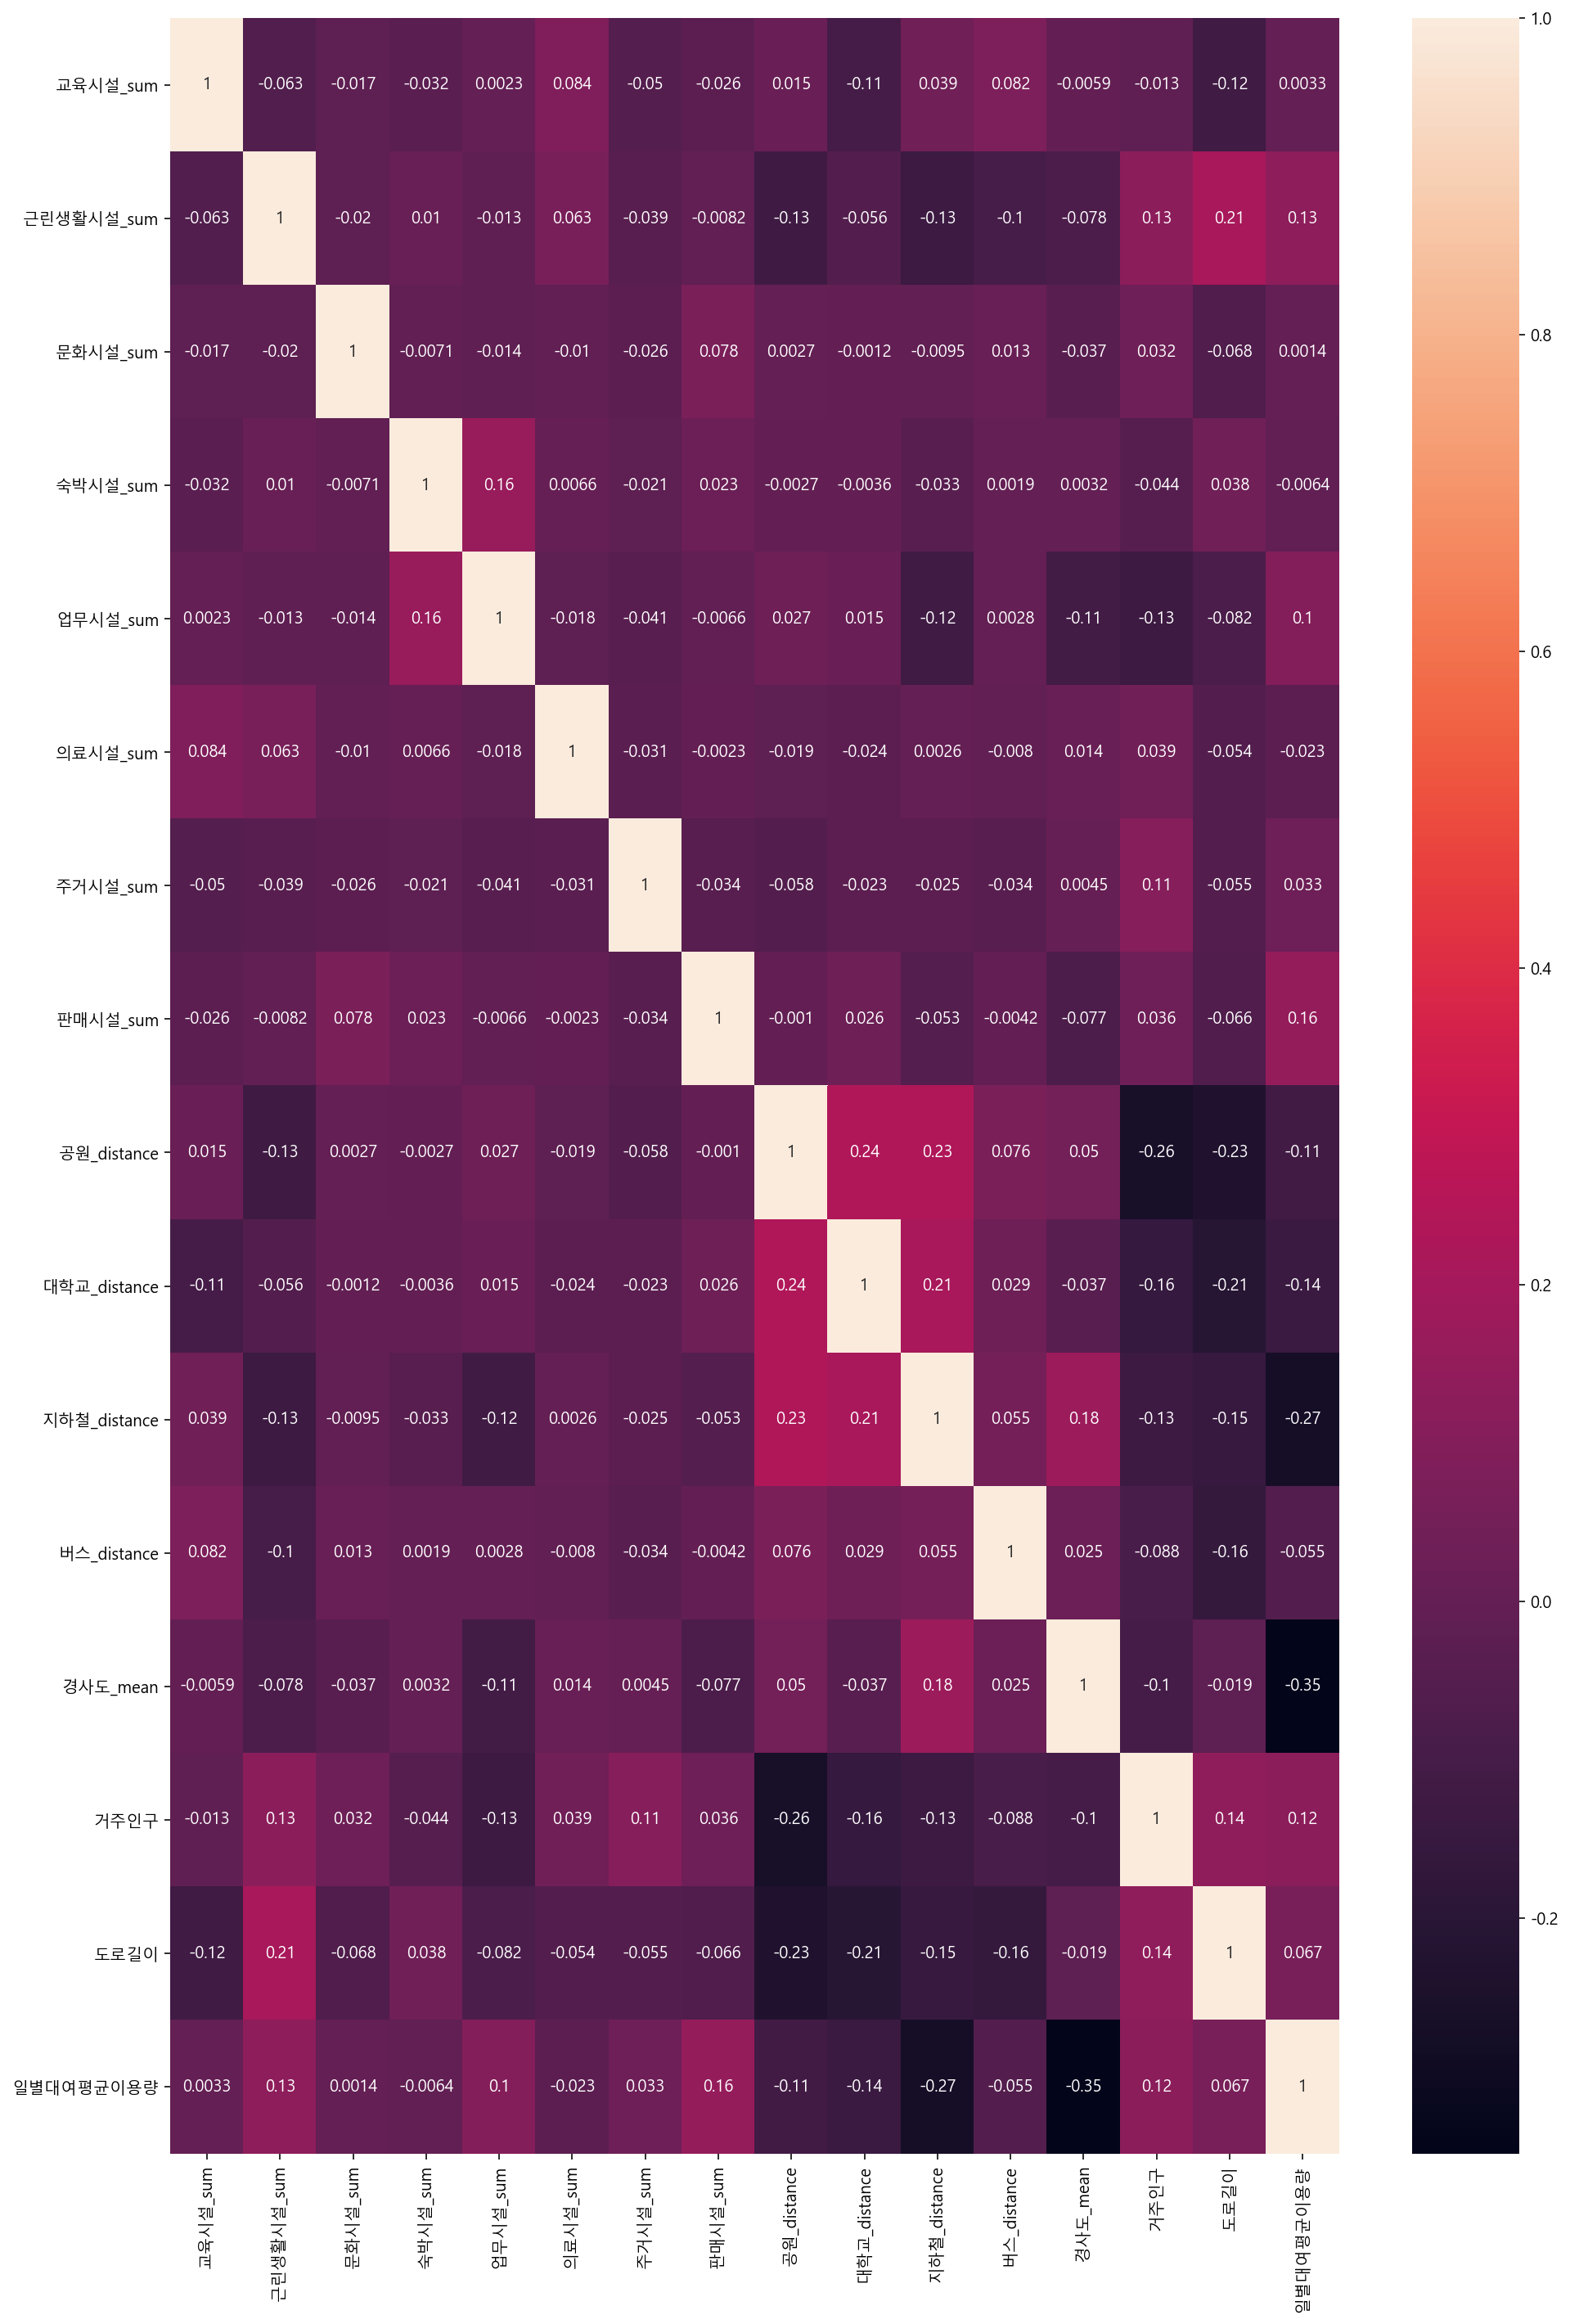

In [24]:
plt.figure(figsize=(16,24))
sns.heatmap(total.corr(), annot=True)

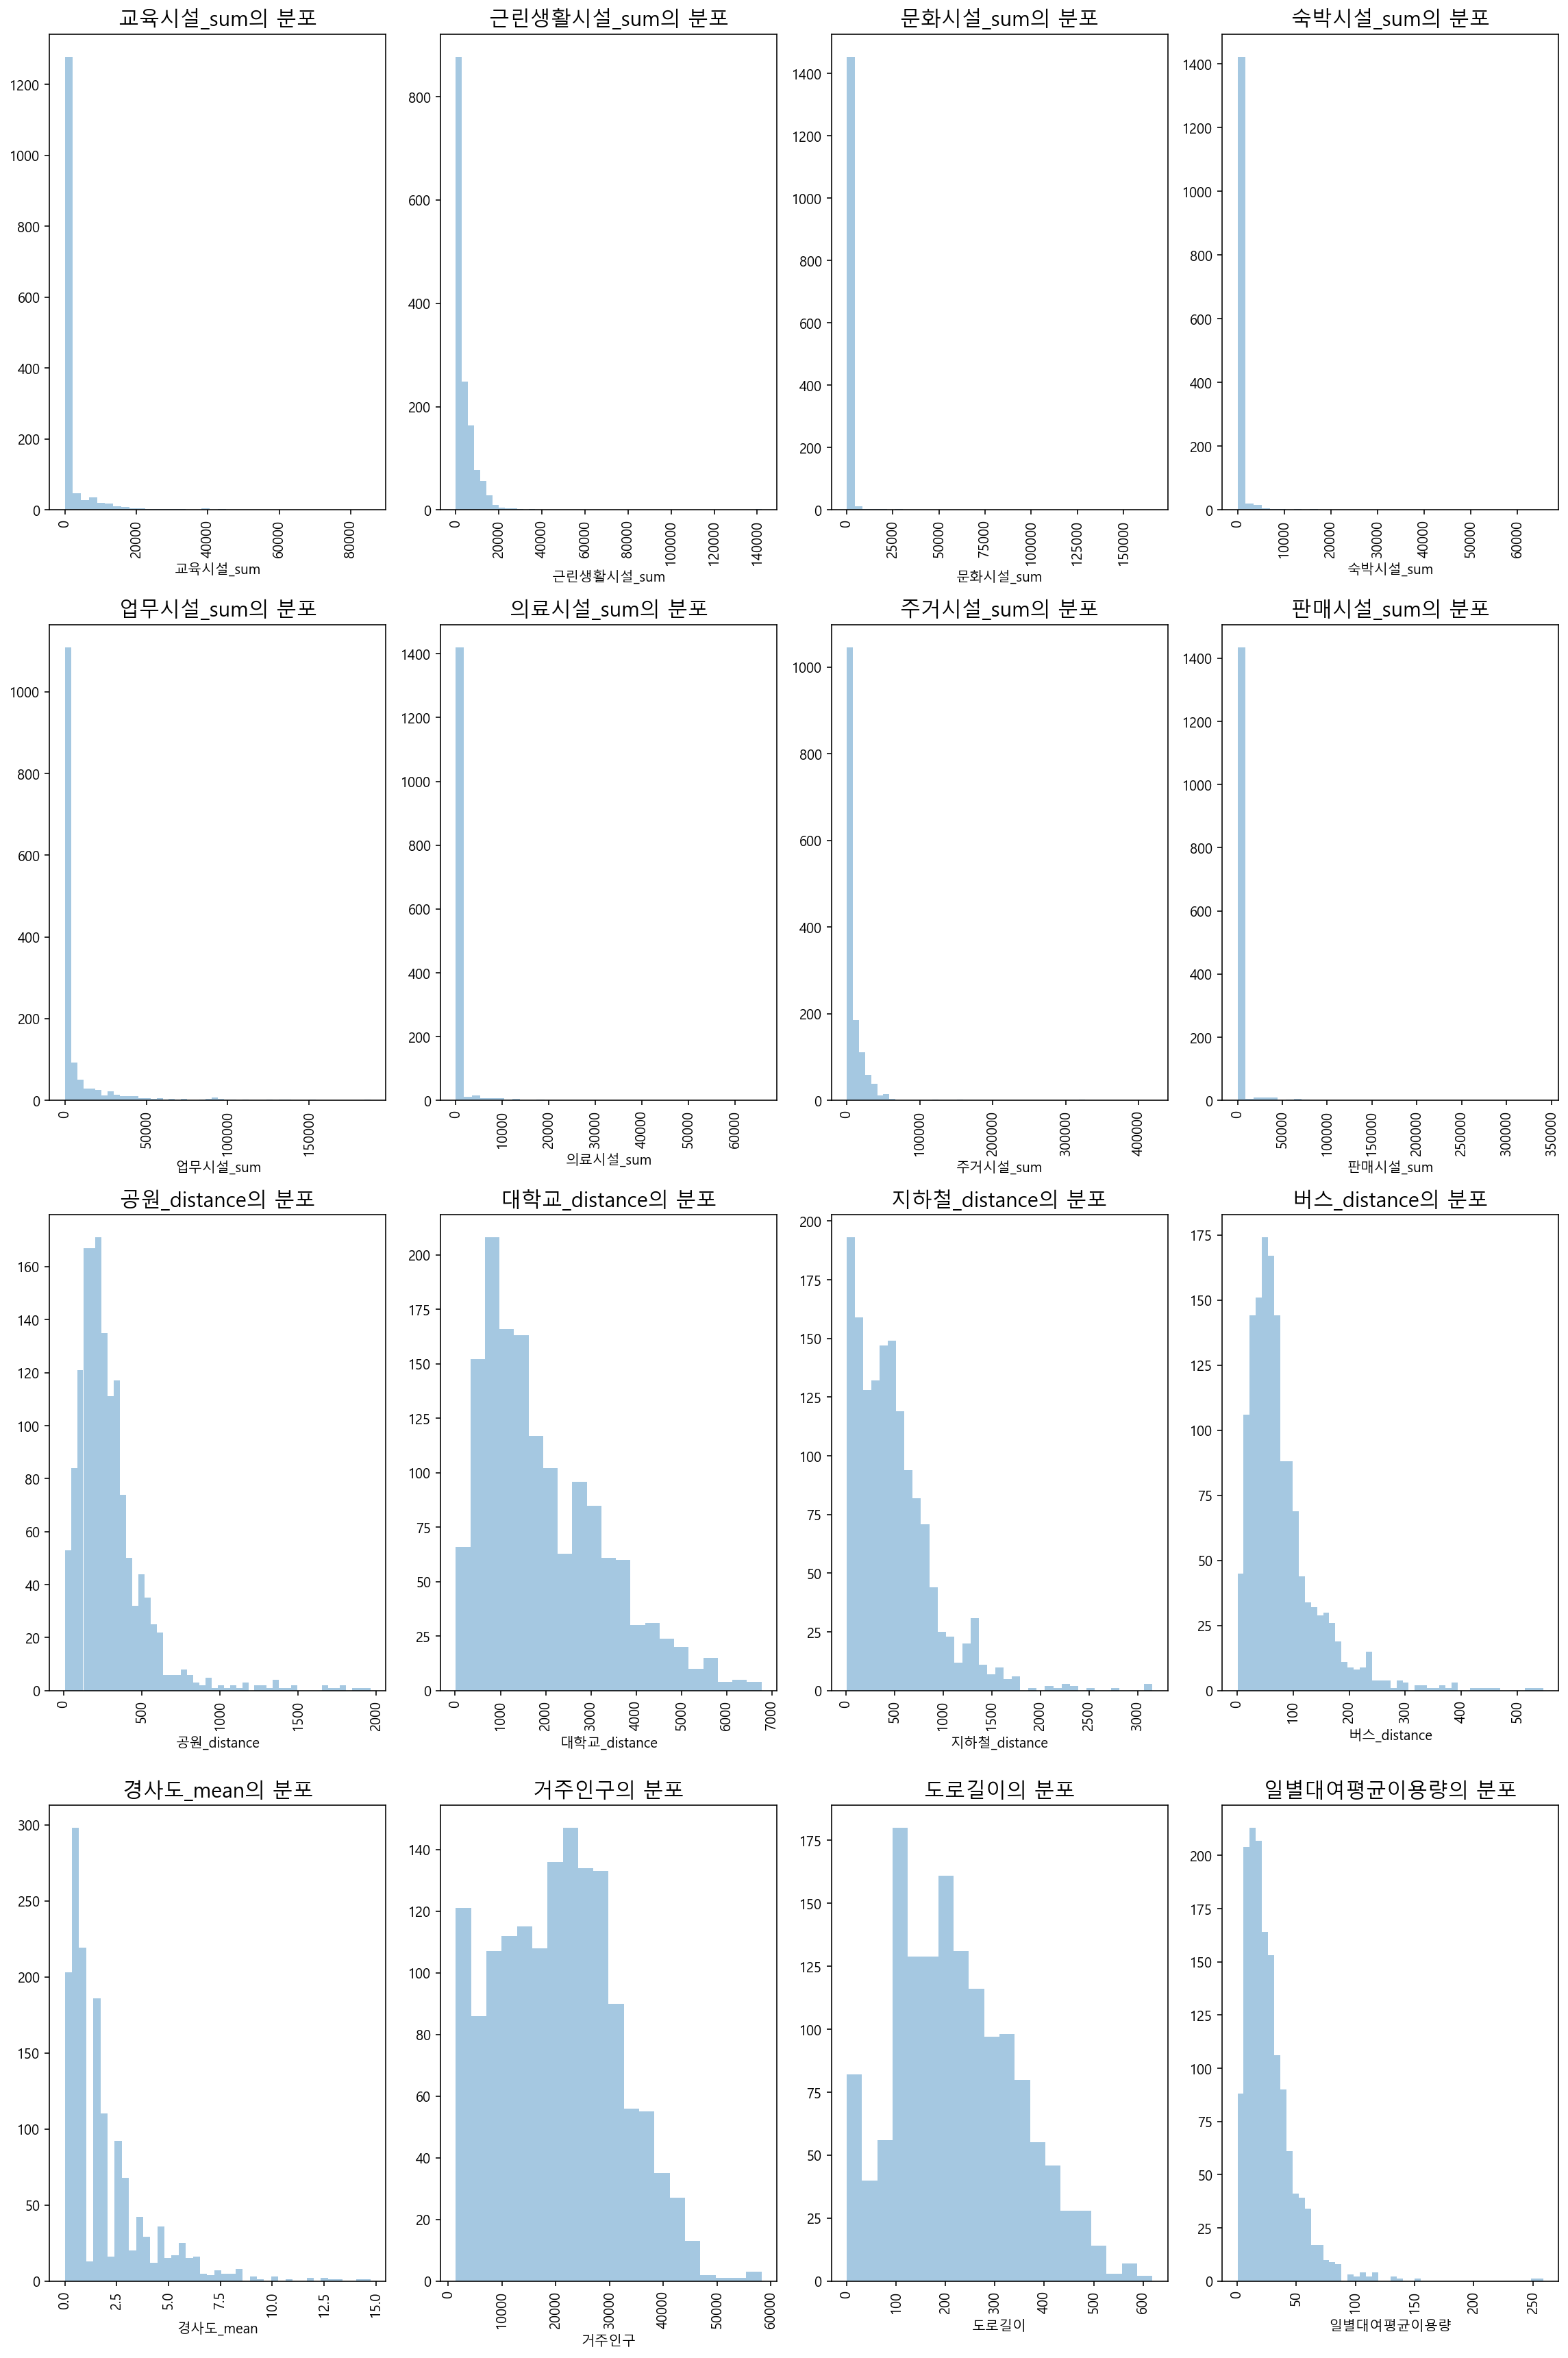

In [25]:
plt.figure(figsize=(16,24)) # 먼저 창을 만들고
n=1
for feature in total.columns:
    ax = plt.subplot(4,4,n) # for문을 돌면서 Axes를 추가
    plt.title('%s의 분포' %feature, fontsize=15)
    sns.distplot(total[feature], kde =False)
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()